In [22]:
import torch
import matplotlib.pyplot as plt
import os
from torch import nn, optim
from time import perf_counter

- 源數據構造

In [23]:
X = torch.unsqueeze(torch.linspace(-3,3,100000),dim=1)
X.size()

torch.Size([100000, 1])

In [24]:
Y = X + 1.2 * torch.rand(X.size())
Y.size()

torch.Size([100000, 1])

# 神經網絡實現線性回歸

- 自定義一個神經網絡類

In [31]:
class LR(nn.Module):
    def __init__(self) -> None:
        super(LR,self).__init__() # 調用父類的構造方法
        self.linear = nn.Linear(in_features=1,out_features=1) # 每個樣本的輸入/輸出大小，也就是有多少個特征
    
    def forward(self,x): # 前向傳播方法，x參數接收輸入數據
        out = self.linear(x) # 線性加權操作
        return out

- 判斷CUDA加速

In [32]:
CUDA = torch.cuda.is_available()
if CUDA:
    LR_module = LR().cuda()
    inputs = X.cuda()
    targets = Y.cuda()
else:
    LR_module = LR()
    inputs = X
    targets = Y

- 損失函數和優化器

In [33]:
criterion = nn.MSELoss()
optimizer = optim.SGD(LR_module.parameters(), lr=1e-4) # 隨機梯度下降法優化器

- 繪圖函數

In [28]:
def draw(output, loss):
    if CUDA:
        output = output.cpu()
    plt.cla()
    plt.scatter(X.numpy(), Y.numpy()) # 原始數據的散點圖
    plt.plot(X.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.text(0.5,0,f'Loss={loss.item()}',fontdict={'size':20,'color':'red'})
    plt.pause(0.005)

- 訓練

In [34]:
def train(model, criterion, optimizer,epochs):
    for epoch in range(epochs):
        output = model(inputs) # 調用神經網絡對象進行前向傳播
        loss = criterion(output,targets) # 損失值
        optimizer.zero_grad() # 清空上一輪的梯度值
        loss.backward() # 反向傳播，計算梯度
        optimizer.step() # 更新權重值
        if epoch % 400 == 0:
            draw(output, loss) # 每80輪
    return model, loss 

- 調用測試

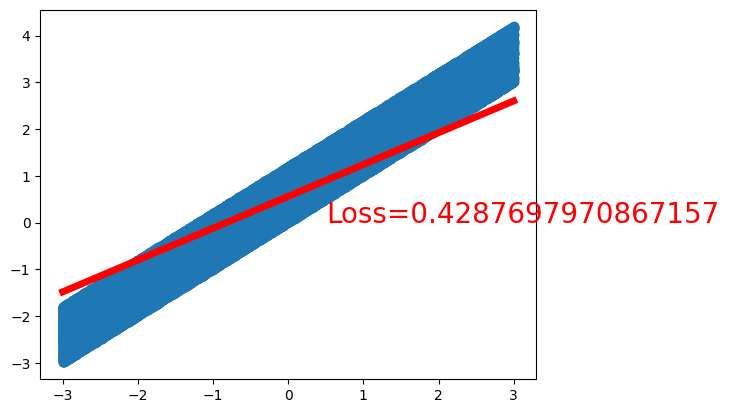

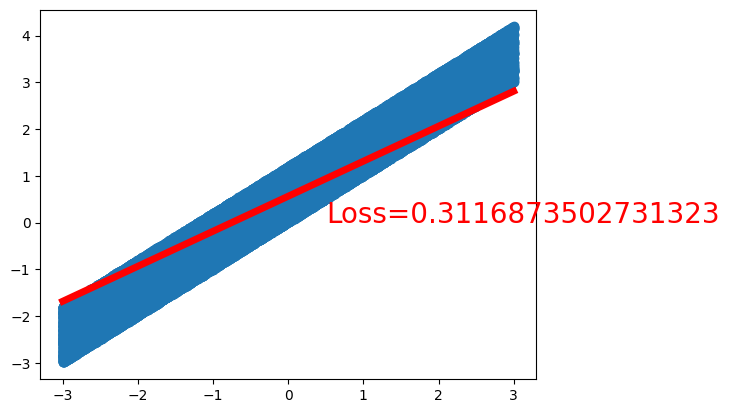

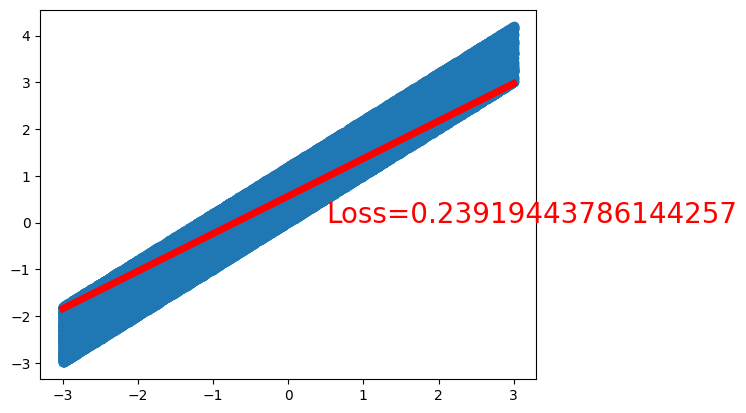

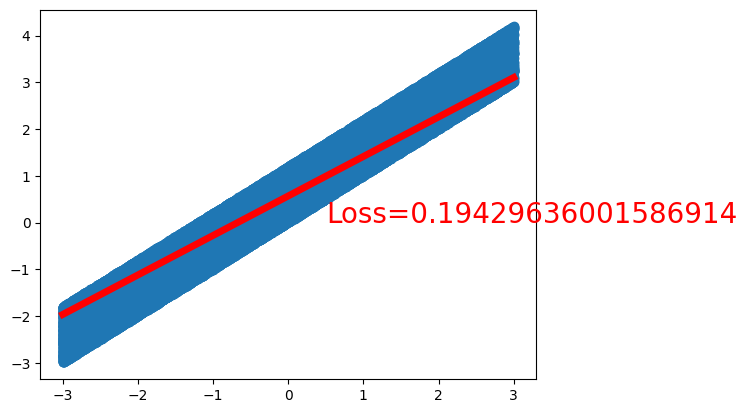

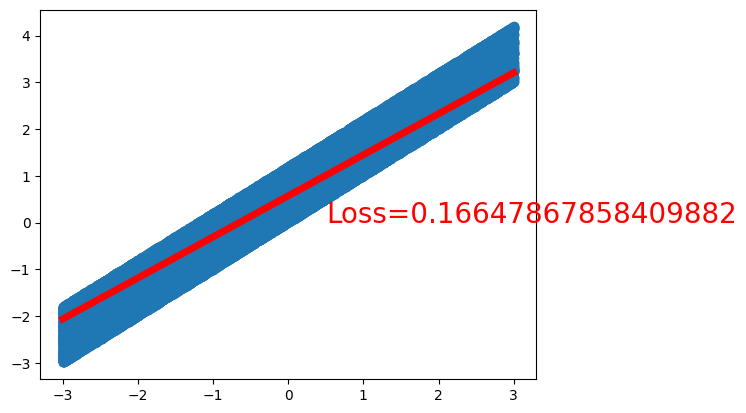

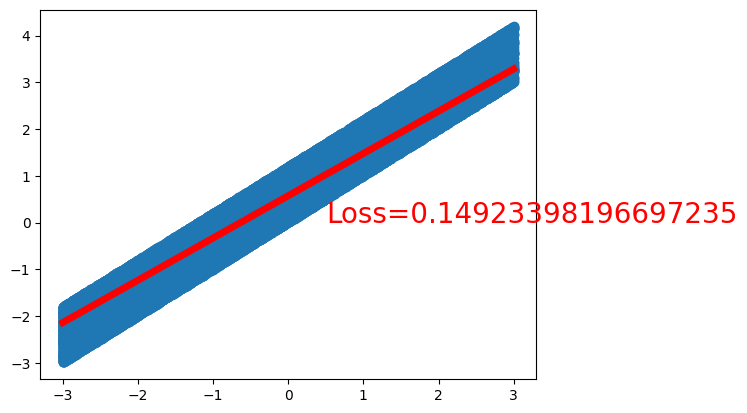

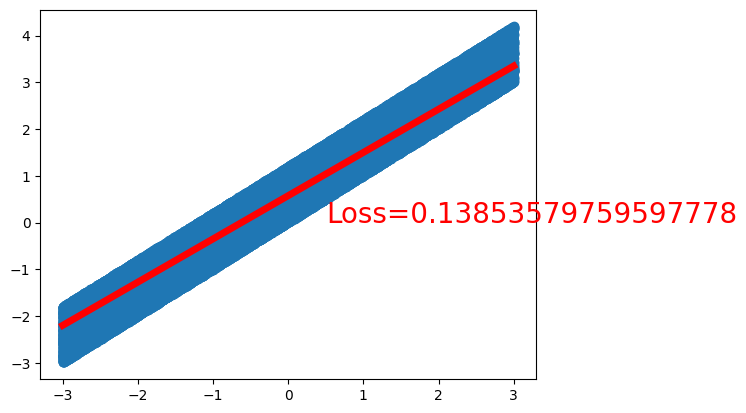

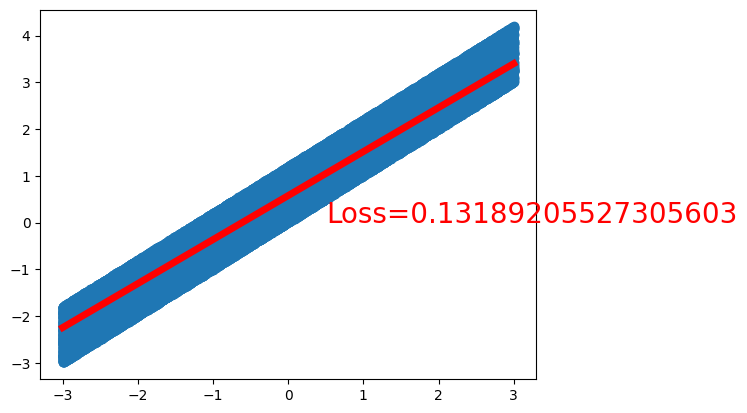

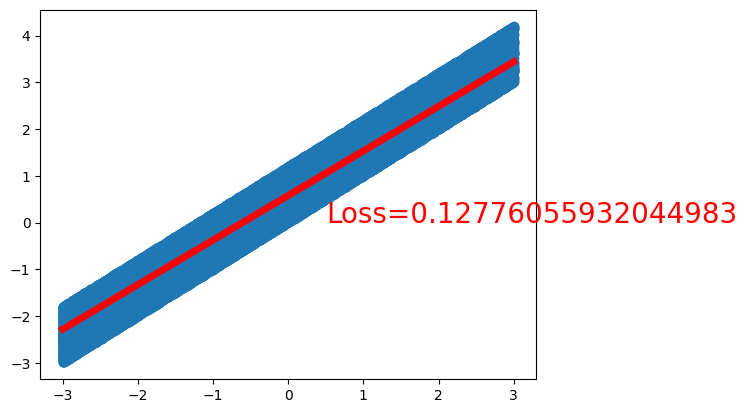

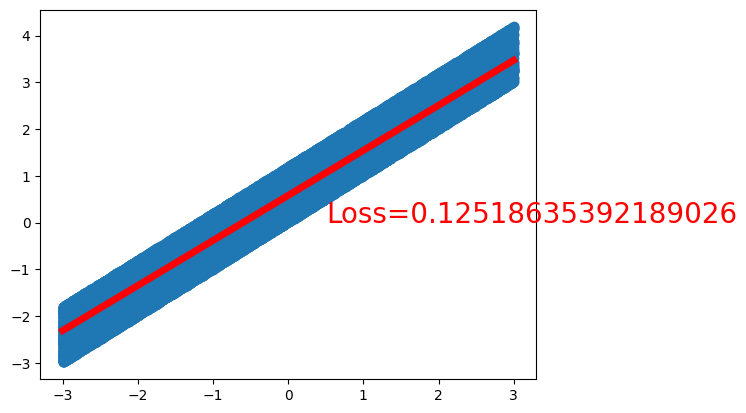

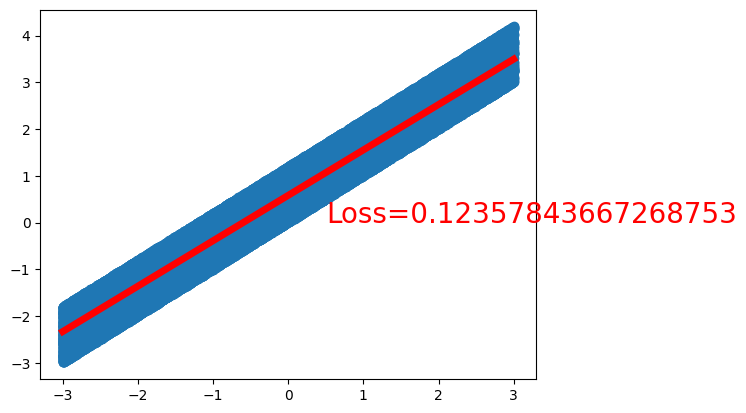

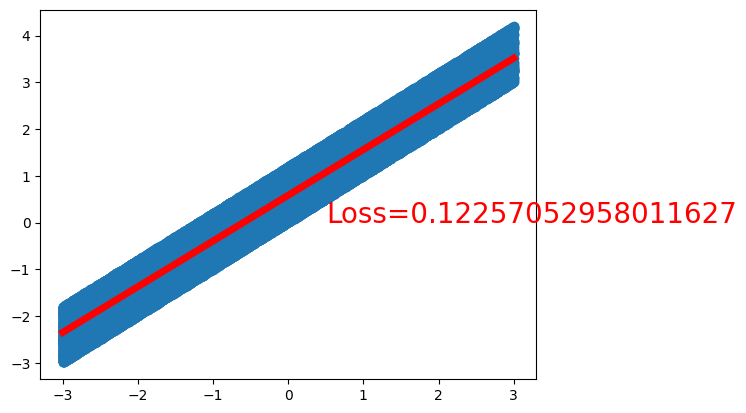

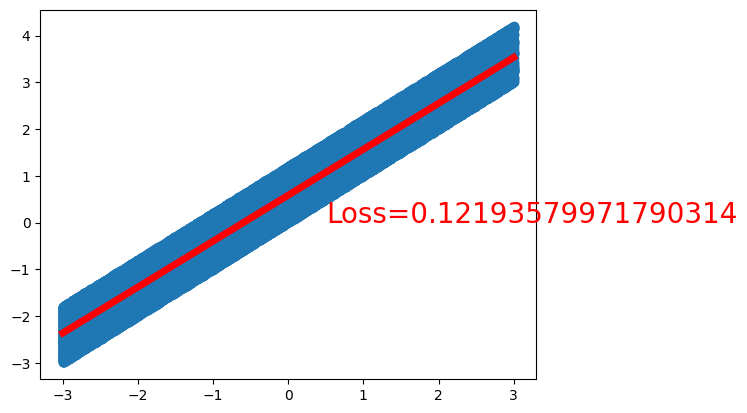

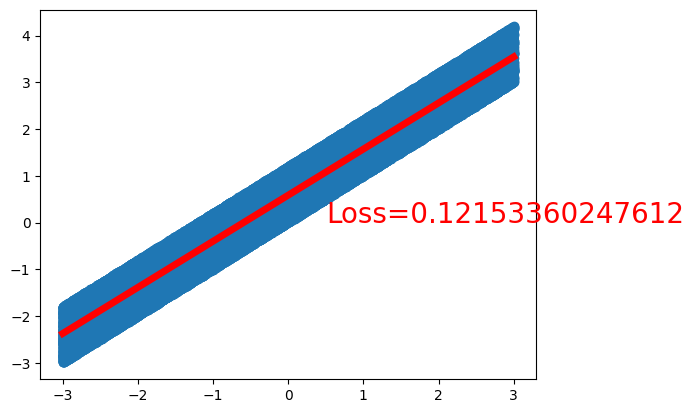

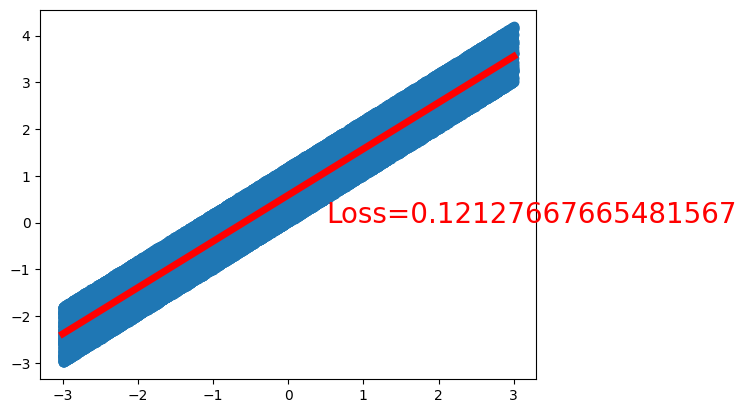

訓練耗費時間： 13.880924699944444
final loss: 0.12111113220453262
weights [Parameter containing:
tensor([[0.9918]], requires_grad=True), Parameter containing:
tensor([0.5878], requires_grad=True)]


In [36]:
start = perf_counter()
model, loss = train(LR_module, criterion, optimizer, epochs=6000)
finish = perf_counter()
time_total = finish - start
print('訓練耗費時間：',time_total)
print('final loss:', loss.item())
print('weights', list(model.parameters()))